In [1]:
pwd

'/Users/sherryliu'

In [2]:
cd ./Desktop

/Users/sherryliu/Desktop


/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


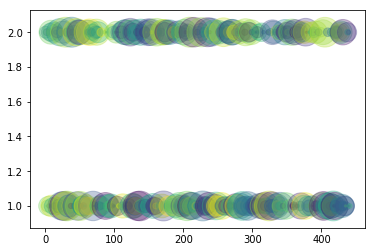

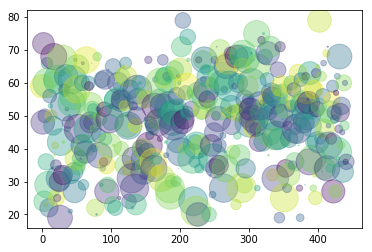

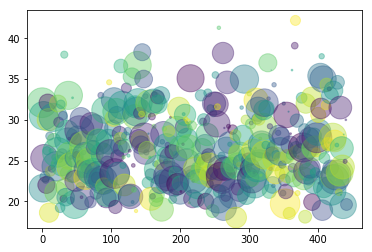

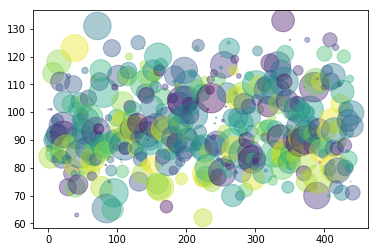

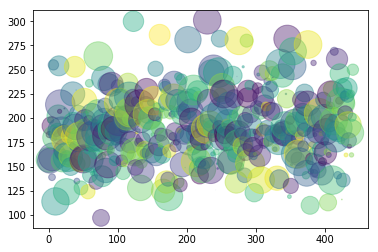

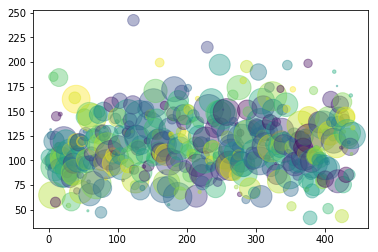

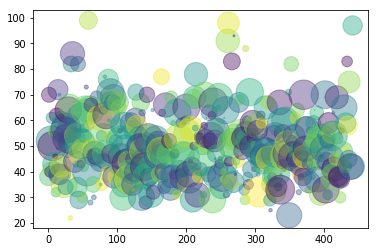

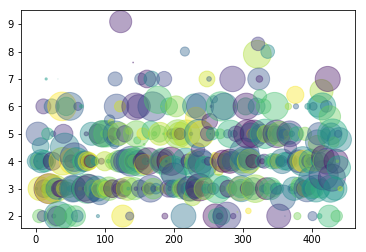

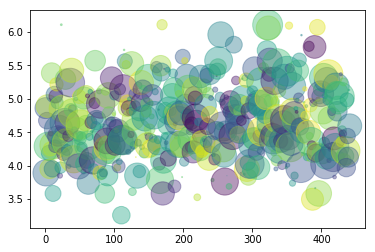

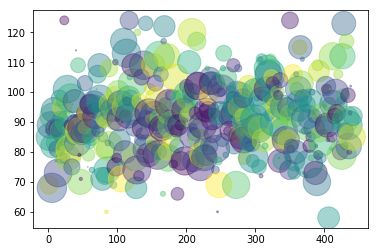

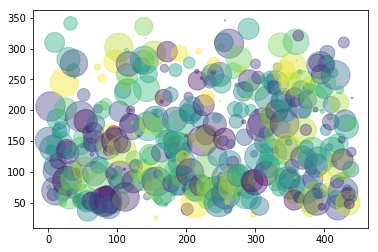

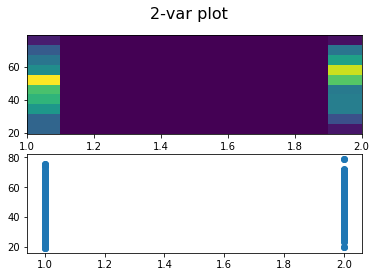

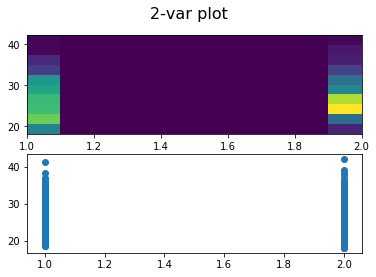

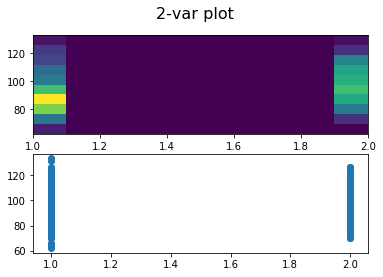

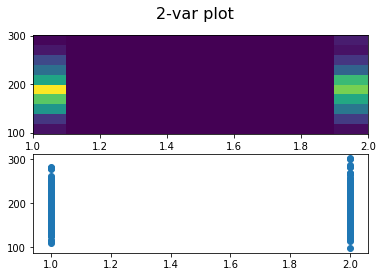

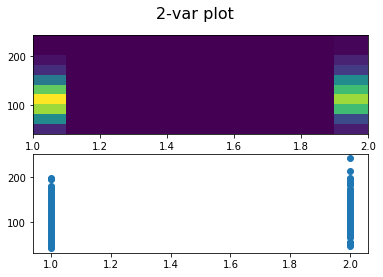

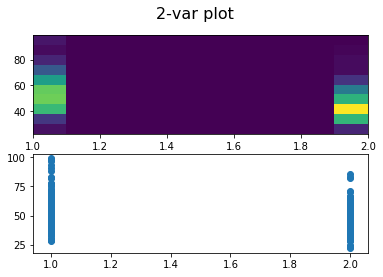

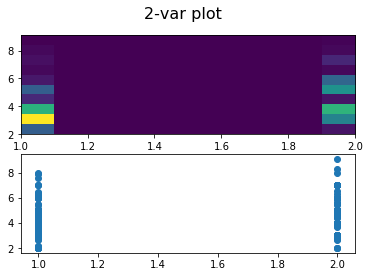

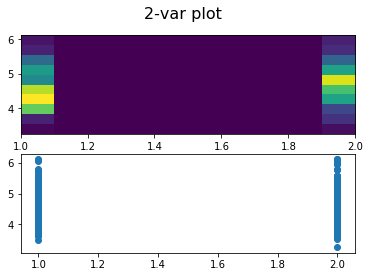

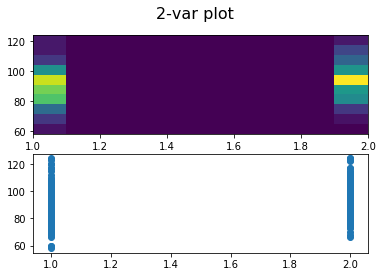

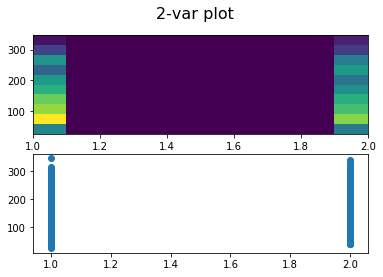

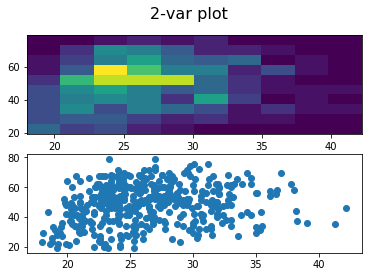

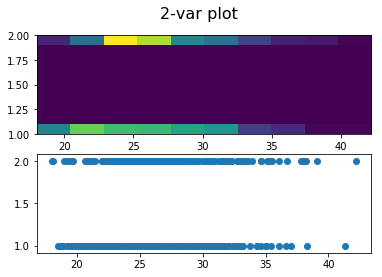

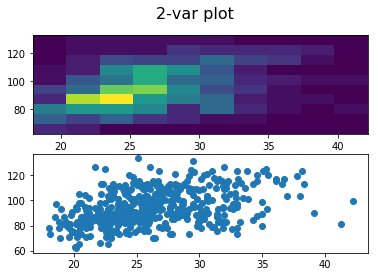

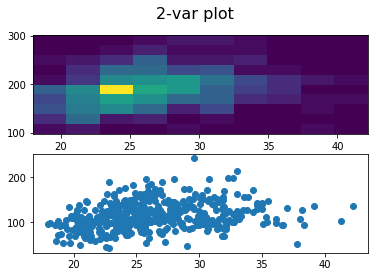

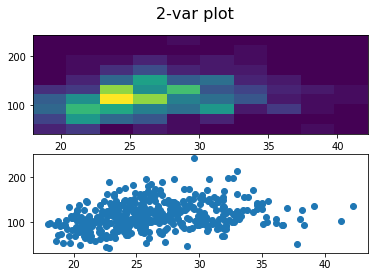

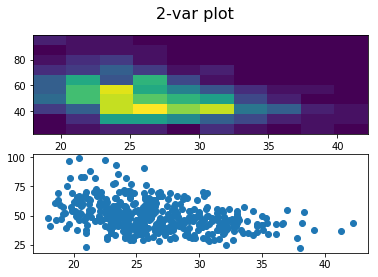

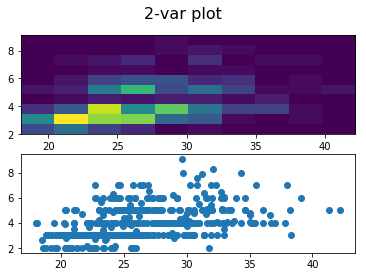

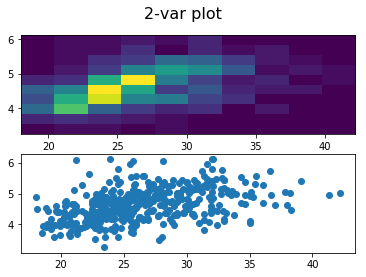

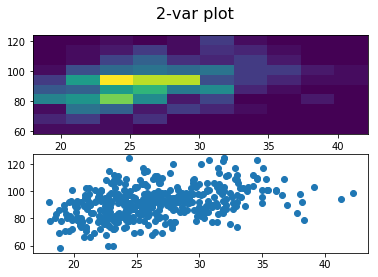

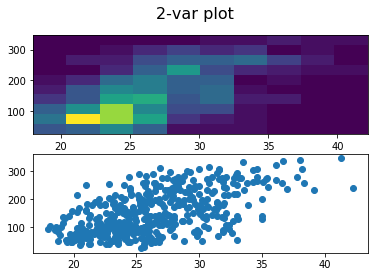

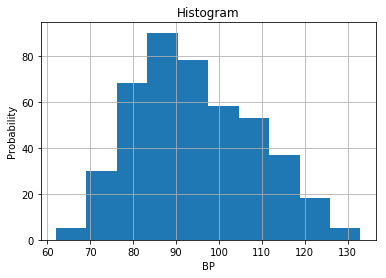

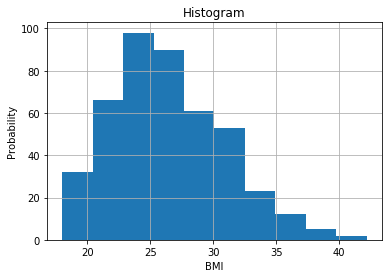

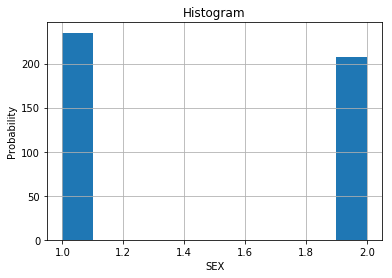

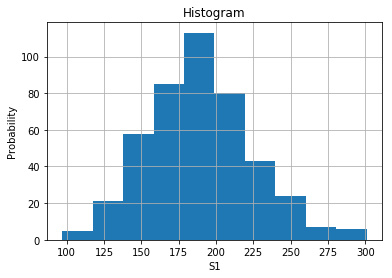

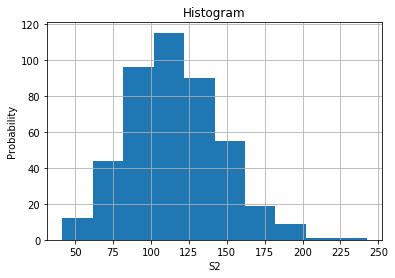

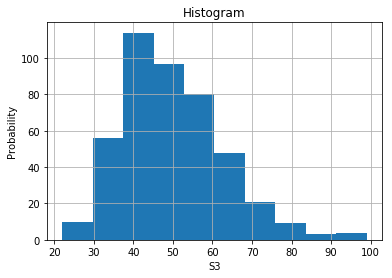

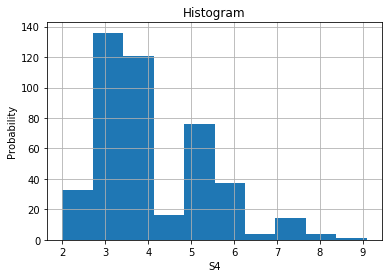

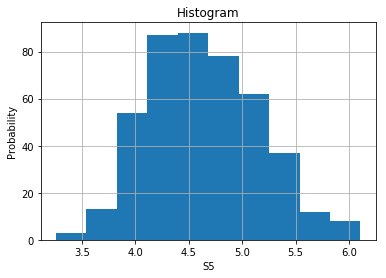

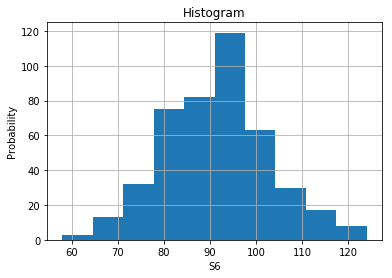

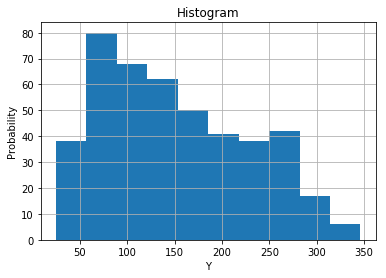

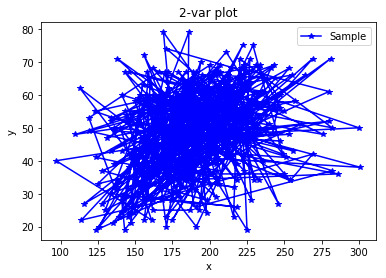

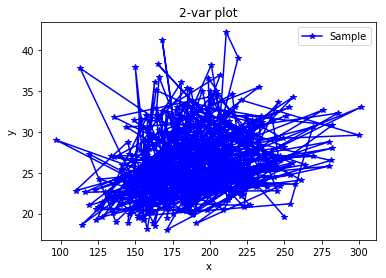

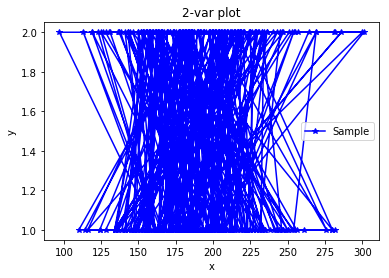

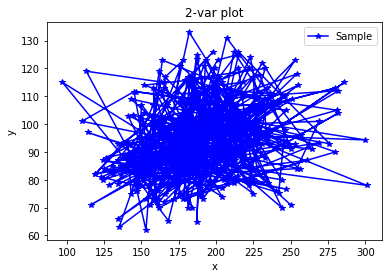

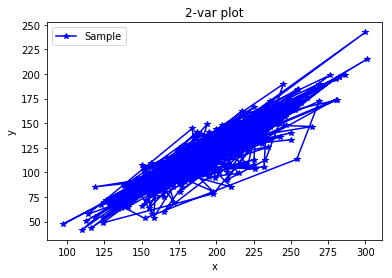

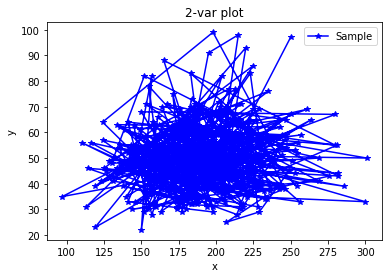

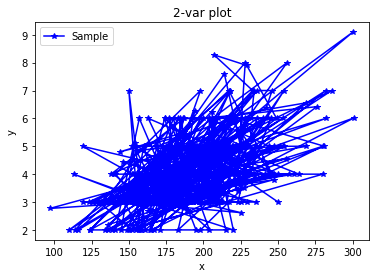

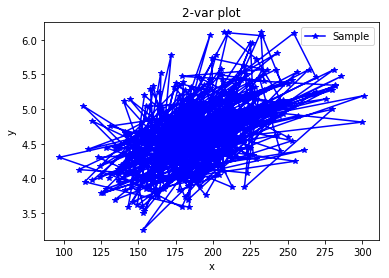

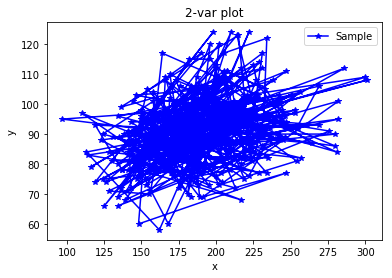

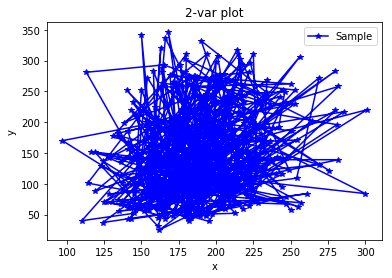

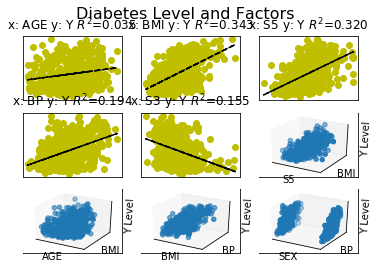

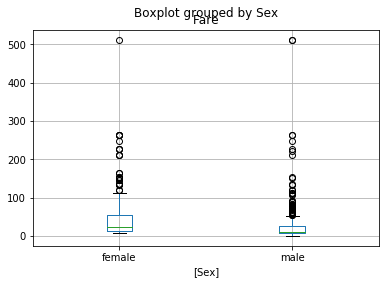

In [7]:
import numpy as np
import pandas as pd

import numpy.polynomial.polynomial as poly  # try to avoid np.polyfit

import matplotlib.pyplot as plt
from IPython import get_ipython

from mpl_toolkits.mplot3d import Axes3D


def plot_tag(x_tag, y_tag, dia):
    # x_tag, y_tag are both columns of diabetes.data
    data = dia[[x_tag, y_tag]]
    x = data[x_tag]
    y = data[y_tag]
    coefs = poly.polyfit(x, y, 1)
    r_2 = (np.corrcoef(x, y)[0, 1])**2
    return x, y, coefs, r_2


def plot1(x_tag_array, y_tag, dia):
    # first 4 linear regression plots
    x0, y, coefs0, r0 = plot_tag(x_tag_array[0], y_tag, dia)
    x1, y, coefs1, r1 = plot_tag(x_tag_array[1], y_tag, dia)
    x2, y, coefs2, r2 = plot_tag(x_tag_array[2], y_tag, dia)
    x3, y, coefs3, r3 = plot_tag(x_tag_array[3], y_tag, dia)

    x5, y, coefs5, r5 = plot_tag(x_tag_array[5], y_tag, dia)
    x6, y, coefs6, r6 = plot_tag(x_tag_array[6], y_tag, dia)

    fig, axs = plt.subplots(3, 3)
    axs[0, 0].plot(x0, y, 'yo', x0, coefs0[1]*x0 + coefs0[0], '--k')
    axs[0, 0].set_title('x: ' + x_tag_array[0] + ' y: ' + y_tag + ' '+ r'$R^2$=' + str(r0)[:5])

    axs[0, 1].plot(x1, y, 'yo', x1, coefs1[1]*x1 + coefs1[0], '--k')
    axs[0, 1].set_title('x: ' + x_tag_array[1] + ' y: ' + y_tag + ' '+ r'$R^2$=' + str(r1)[:5])

    axs[1, 0].plot(x2, y, 'yo', x2, coefs2[1]*x2 + coefs2[0], '--k')
    axs[1, 0].set_title('x: ' + x_tag_array[2] + ' y: ' + y_tag + ' '+ r'$R^2$=' + str(r2)[:5])

    axs[1, 1].plot(x3, y, 'yo', x3, coefs3[1]*x3 + coefs3[0], '--k')
    axs[1, 1].set_title('x: ' + x_tag_array[3] + ' y: ' + y_tag + ' '+ r'$R^2$=' + str(r3)[:5])

    axs[0, 2].plot(x5, y, 'yo', x5, coefs5[1]*x5 + coefs5[0], '--k')
    axs[0, 2].set_title('x: ' + x_tag_array[5] + ' y: ' + y_tag + ' '+ r'$R^2$=' + str(r5)[:5])

    # axs[1, 2].plot(x6, y, 'yo', x6, coefs6[1]*x6 + coefs6[0], '--k')
    # axs[1, 2].set_title('x: ' + x_tag_array[6] + ' y: ' + y_tag + ' '+ r'$R^2$=' + str(r6)[:5])
    
    # 6th (3-D) plot
    ax = fig.add_subplot(3, 3, 6, projection='3d')
    ax.scatter(x5, x1, y)
    # ax.set_zlim(-1, 1)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_zlabel('Y Level')
    ax.set_xlabel(x_tag_array[5])
    ax.set_ylabel(x_tag_array[1])
    ax.xaxis.labelpad = -10
    ax.yaxis.labelpad = -10
    ax.zaxis.labelpad = -10
    
    # 7th (3-D) plot
    ax = fig.add_subplot(3, 3, 7, projection='3d')
    ax.scatter(x0, x1, y)
    # ax.set_zlim(-1, 1)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_zlabel('Y Level')
    ax.set_xlabel(x_tag_array[0])
    ax.set_ylabel(x_tag_array[1])
    ax.xaxis.labelpad = -10
    ax.yaxis.labelpad = -10
    ax.zaxis.labelpad = -10

    # 8th (3-D) plot
    ax = fig.add_subplot(3, 3, 8, projection='3d')
    ax.scatter(x1, x2, y)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_zlabel('Y Level')
    ax.set_xlabel(x_tag_array[1])
    ax.set_ylabel(x_tag_array[2])
    ax.xaxis.labelpad = -10
    ax.yaxis.labelpad = -10
    ax.zaxis.labelpad = -10

    # 9th (3-D) plot
    ax = fig.add_subplot(3, 3, 9, projection='3d')
    x4, y, coefs4, r4 = plot_tag(x_tag_array[4], y_tag, dia)  # SEX
    ax.scatter(x4, x2, y)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_zlabel('Y Level')
    ax.set_xlabel(x_tag_array[4])
    ax.set_ylabel(x_tag_array[2])
    ax.xaxis.labelpad = -10
    ax.yaxis.labelpad = -10
    ax.zaxis.labelpad = -10
    
    for i in axs.flat:
        i.set_xticks([])
        i.set_yticks([])
    fig.suptitle('Diabetes Level and Factors', fontsize=16)
    # end of the main plot
    return plt


def plot_others(dia):
    # this is the function to plot all the other plots
    # and should contain (much) less info
    plt.figure(0)
    plt.scatter(dia.index, dia['SEX'], c=np.random.rand(len(dia)),
                alpha=0.3, s=(30 * np.random.rand(len(dia)))**2)
    plt.figure(1)
    plt.scatter(dia.index, dia['AGE'], c=np.random.rand(len(dia)),
                alpha=0.35, s=(30 * np.random.rand(len(dia)))**2)
    plt.figure(2)
    plt.scatter(dia.index, dia['BMI'], c=np.random.rand(len(dia)),
                alpha=0.4, s=(30 * np.random.rand(len(dia)))**2)
    plt.figure(3)
    plt.scatter(dia.index, dia['BP'], c=np.random.rand(len(dia)),
                alpha=0.4, s=(30 * np.random.rand(len(dia)))**2)
    plt.figure(4)
    plt.scatter(dia.index, dia['S1'], c=np.random.rand(len(dia)),
                alpha=0.4, s=(30 * np.random.rand(len(dia)))**2)
    plt.figure(5)
    plt.scatter(dia.index, dia['S2'], c=np.random.rand(len(dia)),
                alpha=0.4, s=(30 * np.random.rand(len(dia)))**2)
    plt.figure(6)
    plt.scatter(dia.index, dia['S3'], c=np.random.rand(len(dia)),
                alpha=0.4, s=(30 * np.random.rand(len(dia)))**2)
    plt.figure(7)
    plt.scatter(dia.index, dia['S4'], c=np.random.rand(len(dia)),
                alpha=0.4, s=(30 * np.random.rand(len(dia)))**2)
    plt.figure(8)
    plt.scatter(dia.index, dia['S5'], c=np.random.rand(len(dia)),
                alpha=0.4, s=(30 * np.random.rand(len(dia)))**2)
    plt.figure(9)
    plt.scatter(dia.index, dia['S6'], c=np.random.rand(len(dia)),
                alpha=0.4, s=(30 * np.random.rand(len(dia)))**2)
    plt.figure(10)
    plt.scatter(dia.index, dia['Y'], c=np.random.rand(len(dia)),
                alpha=0.4, s=(30 * np.random.rand(len(dia)))**2)

    # Group 2
    fig = plt.figure(11)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['SEX'], dia['AGE'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['SEX'], dia['AGE'])
    fig.suptitle('2-var plot', fontsize=16)

    fig = plt.figure(12)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['SEX'], dia['BMI'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['SEX'], dia['BMI'])
    fig.suptitle('2-var plot', fontsize=16)

    fig = plt.figure(13)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['SEX'], dia['BP'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['SEX'], dia['BP'])
    fig.suptitle('2-var plot', fontsize=16)

    fig = plt.figure(14)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['SEX'], dia['S1'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['SEX'], dia['S1'])
    fig.suptitle('2-var plot', fontsize=16)

    fig = plt.figure(15)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['SEX'], dia['S2'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['SEX'], dia['S2'])
    fig.suptitle('2-var plot', fontsize=16)
    
    fig = plt.figure(16)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['SEX'], dia['S3'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['SEX'], dia['S3'])
    fig.suptitle('2-var plot', fontsize=16)

    fig = plt.figure(17)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['SEX'], dia['S4'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['SEX'], dia['S4'])
    fig.suptitle('2-var plot', fontsize=16)

    fig = plt.figure(18)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['SEX'], dia['S5'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['SEX'], dia['S5'])
    fig.suptitle('2-var plot', fontsize=16)
    
    fig = plt.figure(19)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['SEX'], dia['S6'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['SEX'], dia['S6'])
    fig.suptitle('2-var plot', fontsize=16)

    fig = plt.figure(20)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['SEX'], dia['Y'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['SEX'], dia['Y'])
    fig.suptitle('2-var plot', fontsize=16)

    fig = plt.figure(21)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['BMI'], dia['AGE'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['BMI'], dia['AGE'])
    fig.suptitle('2-var plot', fontsize=16)

    fig = plt.figure(22)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['BMI'], dia['SEX'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['BMI'], dia['SEX'])
    fig.suptitle('2-var plot', fontsize=16)

    fig = plt.figure(23)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['BMI'], dia['BP'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['BMI'], dia['BP'])
    fig.suptitle('2-var plot', fontsize=16)

    fig = plt.figure(24)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['BMI'], dia['S1'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['BMI'], dia['S2'])
    fig.suptitle('2-var plot', fontsize=16)

    fig = plt.figure(25)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['BMI'], dia['S2'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['BMI'], dia['S2'])
    fig.suptitle('2-var plot', fontsize=16)

    fig = plt.figure(26)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['BMI'], dia['S3'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['BMI'], dia['S3'])
    fig.suptitle('2-var plot', fontsize=16)
    
    fig = plt.figure(27)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['BMI'], dia['S4'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['BMI'], dia['S4'])
    fig.suptitle('2-var plot', fontsize=16)
    
    fig = plt.figure(28)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['BMI'], dia['S5'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['BMI'], dia['S5'])
    fig.suptitle('2-var plot', fontsize=16)
    
    fig = plt.figure(29)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['BMI'], dia['S6'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['BMI'], dia['S6'])
    fig.suptitle('2-var plot', fontsize=16)
    
    fig = plt.figure(30)
    ax = fig.add_subplot(2, 1, 1)
    ax.hist2d(dia['BMI'], dia['Y'])
    ax = fig.add_subplot(2, 1, 2)
    ax.scatter(dia['BMI'], dia['Y'])
    fig.suptitle('2-var plot', fontsize=16)
    
    # Group 3
    plt.figure(31)
    plt.hist(dia['BP'])
    plt.grid(True)
    plt.title('Histogram')
    plt.xlabel('BP')
    plt.ylabel('Probability')

    plt.figure(32)
    plt.hist(dia['BMI'])
    plt.grid(True)
    plt.title('Histogram')
    plt.xlabel('BMI')
    plt.ylabel('Probability')
    
    plt.figure(33)
    plt.hist(dia['SEX'])
    plt.grid(True)
    plt.title('Histogram')
    plt.xlabel('SEX')
    plt.ylabel('Probability')
    
    plt.figure(34)
    plt.hist(dia['S1'])
    plt.grid(True)
    plt.title('Histogram')
    plt.xlabel('S1')
    plt.ylabel('Probability')
    
    plt.figure(35)
    plt.hist(dia['S2'])
    plt.grid(True)
    plt.title('Histogram')
    plt.xlabel('S2')
    plt.ylabel('Probability')

    plt.figure(36)
    plt.hist(dia['S3'])
    plt.grid(True)
    plt.title('Histogram')
    plt.xlabel('S3')
    plt.ylabel('Probability')

    plt.figure(37)
    plt.hist(dia['S4'])
    plt.grid(True)
    plt.title('Histogram')
    plt.xlabel('S4')
    plt.ylabel('Probability')
    
    plt.figure(38)
    plt.hist(dia['S5'])
    plt.grid(True)
    plt.title('Histogram')
    plt.xlabel('S5')
    plt.ylabel('Probability')

    plt.figure(39)
    plt.hist(dia['S6'])
    plt.grid(True)
    plt.title('Histogram')
    plt.xlabel('S6')
    plt.ylabel('Probability')

    plt.figure(40)
    plt.hist(dia['Y'])
    plt.grid(True)
    plt.title('Histogram')
    plt.xlabel('Y')
    plt.ylabel('Probability')
    
    # Group 4
    plt.figure(41)
    plt.plot(dia['S1'], dia['AGE'], color='blue', marker='*')
    plt.title('2-var plot')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(['Sample'])

    plt.figure(42)
    plt.plot(dia['S1'], dia['BMI'], color='blue', marker='*')
    plt.title('2-var plot')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(['Sample'])

    plt.figure(43)
    plt.plot(dia['S1'], dia['SEX'], color='blue', marker='*')
    plt.title('2-var plot')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(['Sample'])

    plt.figure(44)
    plt.plot(dia['S1'], dia['BP'], color='blue', marker='*')
    plt.title('2-var plot')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(['Sample'])

    plt.figure(45)
    plt.plot(dia['S1'], dia['S2'], color='blue', marker='*')
    plt.title('2-var plot')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(['Sample'])

    plt.figure(46)
    plt.plot(dia['S1'], dia['S3'], color='blue', marker='*')
    plt.title('2-var plot')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(['Sample'])

    plt.figure(47)
    plt.plot(dia['S1'], dia['S4'], color='blue', marker='*')
    plt.title('2-var plot')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(['Sample'])

    plt.figure(48)
    plt.plot(dia['S1'], dia['S5'], color='blue', marker='*')
    plt.title('2-var plot')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(['Sample'])

    plt.figure(49)
    plt.plot(dia['S1'], dia['S6'], color='blue', marker='*')
    plt.title('2-var plot')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(['Sample'])

    plt.figure(50)
    plt.plot(dia['S1'], dia['Y'], color='blue', marker='*')
    plt.title('2-var plot')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(['Sample'])
    # end
    
    return plt


#if __name__ == '__main__':
mgc = get_ipython().magic
mgc(u'%matplotlib inline')

dia = pd.read_table("diabetes.data")
train = pd.read_csv('train_titanic.csv')

x_tags = ['AGE', 'BMI', 'BP', 'S3', 'SEX', 'S5', 'S6']
y_tag = 'Y'

# Plots for Basic & Advanced
plt = plot_others(dia)  # Figure 0 - Figure 50
plt = plot1(x_tags, y_tag, dia)  # Figure 51

# Reach
# Boxplot
train.boxplot(column=['Fare'], by=['Sex'])  # Figure 52
plt.show()
